In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('option-chain-ED-NIFTY-19-Oct-2023 - Copy.csv')

In [3]:
df.head()

,Type,Volatility,STRIKE,CMP,risk_free,LTP,Expiry
0,CE,3.58,19600,19751.05,0.0685,183.95,0.013699
1,CE,5.14,19650,19751.05,0.0685,143.55,0.013699
2,CE,6.24,19700,19751.05,0.0685,113.20,0.013699
3,CE,6.73,19750,19751.05,0.0685,86.00,0.013699
4,CE,7.02,19800,19751.05,0.0685,63.00,0.013699


In [4]:
# # Define the range of columns to drop (from column 2 to 4, inclusive)
# start_column = 7
# end_column = 21

# # Drop columns within the specified range
# columns_to_drop = df.columns[start_column:end_column + 1]
# df = df.drop(columns=columns_to_drop)

In [5]:
df.head()

,Type,Volatility,STRIKE,CMP,risk_free,LTP,Expiry
0,CE,3.58,19600,19751.05,0.0685,183.95,0.013699
1,CE,5.14,19650,19751.05,0.0685,143.55,0.013699
2,CE,6.24,19700,19751.05,0.0685,113.20,0.013699
3,CE,6.73,19750,19751.05,0.0685,86.00,0.013699
4,CE,7.02,19800,19751.05,0.0685,63.00,0.013699


In [6]:
# Replace '-' with NaN
df = df.replace('-', float('nan'))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        43 non-null     object 
 1   Volatility  43 non-null     float64
 2   STRIKE      43 non-null     int64  
 3   CMP         43 non-null     float64
 4   risk_free   43 non-null     float64
 5   LTP         43 non-null     float64
 6   Expiry      43 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
# # Convert object-type columns to float using astype
# df['Volatility'] = df['Volatility'].astype(float)
# df['STRIKE'] = df['STRIKE'].astype(float)
# df['LTP'] = df['LTP'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        43 non-null     object 
 1   Volatility  43 non-null     float64
 2   STRIKE      43 non-null     int64  
 3   CMP         43 non-null     float64
 4   risk_free   43 non-null     float64
 5   LTP         43 non-null     float64
 6   Expiry      43 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.5+ KB


In [10]:
df=df.dropna()

In [11]:
df.head()

,Type,Volatility,STRIKE,CMP,risk_free,LTP,Expiry
0,CE,3.58,19600,19751.05,0.0685,183.95,0.013699
1,CE,5.14,19650,19751.05,0.0685,143.55,0.013699
2,CE,6.24,19700,19751.05,0.0685,113.20,0.013699
3,CE,6.73,19750,19751.05,0.0685,86.00,0.013699
4,CE,7.02,19800,19751.05,0.0685,63.00,0.013699


In [12]:
# Rename columns to match your data
df.rename(columns={
    'Type': 'Option_Type',
    'Volatility': 'Implied_Volatility',
    'STRIKE': 'Strike_Price',
    'CMP': 'Current_Nifty_Price',
    'risk_free': 'Risk_Free_Rate',
    'LTP': 'Last_Traded_Price',
    'Expiry': 'Time_to_Expiry'
}, inplace=True)

In [13]:
# # Save the DataFrame to a CSV file
# df.to_csv('OptionData.csv', index=False)  # Use your desired filename

In [14]:
# Define the Black-Scholes formula
def black_scholes(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'CE':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

In [15]:
# Divide the Implied Volatility by 100
df['Implied_Volatility'] /= 100

In [16]:
# Replace values in the "Risk_Free_Rate" column with 0.1
df['Risk_Free_Rate'] = 0.1

In [17]:
# Calculate the theoretical option prices using the Black-Scholes model
df['Theoretical_Price'] = df.apply(lambda row: black_scholes(
    row['Current_Nifty_Price'],
    row['Strike_Price'],
    row['Time_to_Expiry'],
    row['Risk_Free_Rate'],
    row['Implied_Volatility'],
    row['Option_Type']
), axis=1)

In [18]:
# Calculate the absolute difference between the theoretical and actual prices
df['Price_Difference'] = np.abs(df['Theoretical_Price'] - df['Last_Traded_Price'])

In [20]:
    # You can also calculate other metrics to assess accuracy
    # For example, Mean Absolute Error (MAE)
    mae = df['Price_Difference'].mean()

    # Display the DataFrame and MAE
    display(df)
    print(f"Mean Absolute Error (MAE): {mae}")

,Option_Type,Implied_Volatility,Strike_Price,Current_Nifty_Price,Risk_Free_Rate,Last_Traded_Price,Time_to_Expiry,Theoretical_Price,Price_Difference
0,CE,0.0358,19600,19751.05,0.1,183.95,0.013699,178.332865,5.617135
1,CE,0.0514,19650,19751.05,0.1,143.55,0.013699,136.397378,7.152622
2,CE,0.0624,19700,19751.05,0.1,113.20,0.013699,104.675283,8.524717
3,CE,0.0673,19750,19751.05,0.1,86.00,0.013699,77.074236,8.925764
4,CE,0.0702,19800,19751.05,0.1,63.00,0.013699,54.438834,8.561166
5,CE,0.0727,19850,19751.05,0.1,45.10,0.013699,37.292175,7.807825
6,CE,0.0743,19900,19751.05,0.1,31.00,0.013699,24.349194,6.650806
7,CE,0.0744,19950,19751.05,0.1,19.80,0.013699,14.566098,5.233902
8,CE,0.0771,20000,19751.05,0.1,13.45,0.013699,9.330000,4.120000
9,CE,0.0773,20050,19751.05,0.1,8.05,0.013699,5.165144,2.884856


Mean Absolute Error (MAE): 2.0116716505235863


###MAE at 10% risk free rate : 3.36827

In [21]:
# Calculate MSE
mse = (mae ** 2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.0116716505235863
Root Mean Squared Error (RMSE): 2.0116716505235863


In [23]:
import matplotlib.pyplot as plt

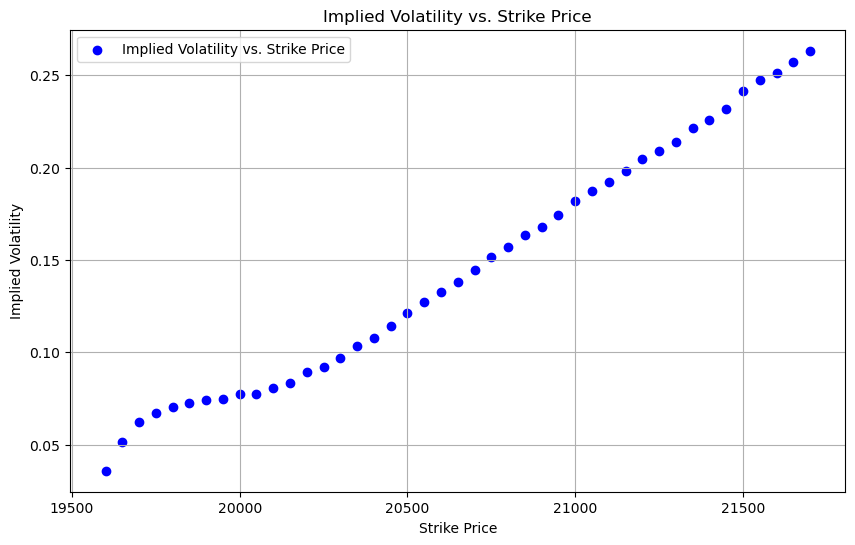

In [25]:
# Assuming you have a DataFrame named 'df' with columns 'Implied_Volatility' and 'Strike_Price'
IV = df['Implied_Volatility']
Strike_Price = df['Strike_Price']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Strike_Price, IV, marker='o', color='b', label='Implied Volatility vs. Strike Price')

# Add labels and a title
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Strike Price')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()